In [61]:
from mypca import *
import pandas as pd
from sklearn import preprocessing, cluster, pipeline, compose, decomposition
from sklearn import manifold
from sklearn import metrics

In [62]:
df = pd.read_csv('kc_house_data.csv')

In [63]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [72]:
X = df.drop(['id', 'date', 'zipcode', 'price'], axis =1)
y = df['price']
n_comp = 6  # Nombre de dimensions
features = X.columns  # Extraction des noms de variables
names = X.index  # Extraction des noms de pays

In [65]:
scaler = preprocessing.StandardScaler()

In [66]:
pca = decomposition.PCA(n_components=n_comp)

pipeline_pca = pipeline.make_pipeline(scaler, pca)

In [67]:
pipeline_pca.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6))])

[0.30110147 0.1211368  0.10599747 0.07658575 0.06419362 0.05737634]


In [73]:
y.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [84]:
label_price = [
    '0 - Très faible',
    '1 - Faible',
    '2 - Moyen',
    '3 - Èlevé',
    '4 - Très élevé'
]

price_cat = pd.cut(y, bins=5, labels=label_price, right=False)

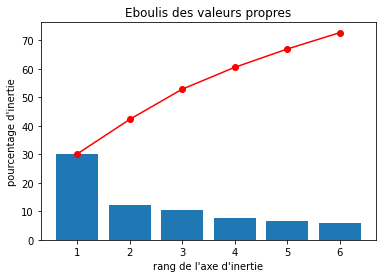

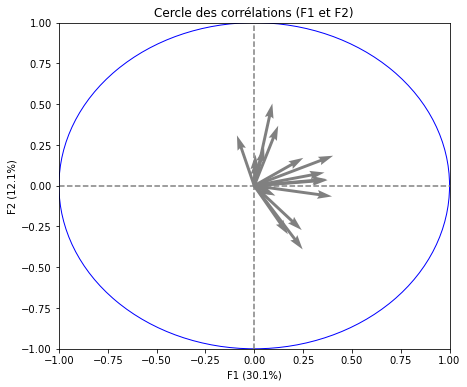

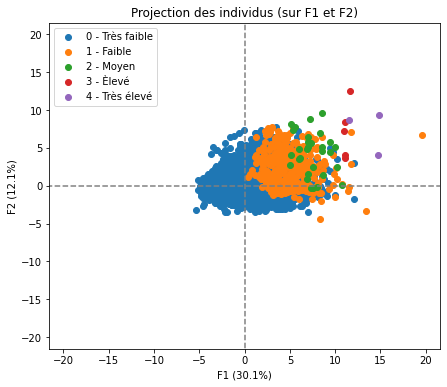

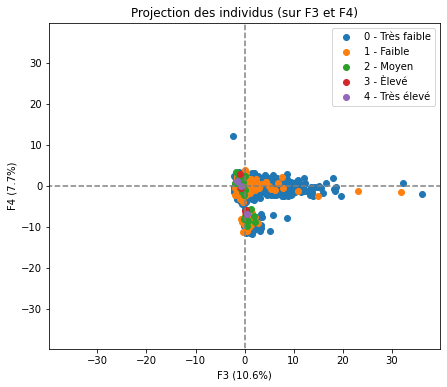

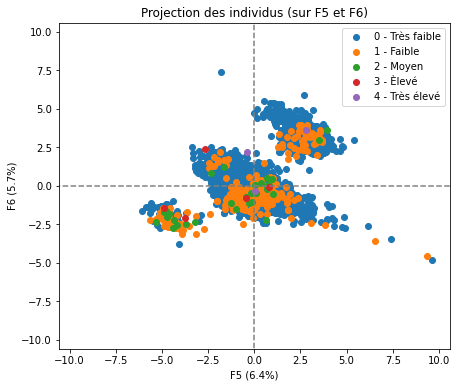

In [85]:
# Eboulis des valeurs propres
display_scree_plot(pipeline_pca[1])

# Cercle des corrélations
pcs = pipeline_pca[1].components_
display_circles(pcs, n_comp, pipeline_pca[1], [(0,1)], labels = None , title='Cercles_corr')

# Projection des individus
X_projected = pipeline_pca.transform(X)
display_factorial_planes(X_projected, n_comp, pipeline_pca[1], [(0,1),(2,3),(4,5)], illustrative_var=price_cat, title='Projection_indiv')

plt.show()

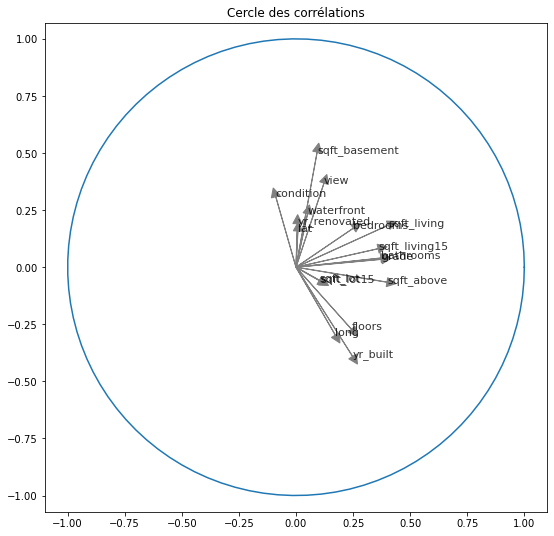

In [86]:
labels = features

# Cercle des corrélations
(fig, ax) = plt.subplots(figsize=(9, 9))
for i in range(0, pipeline_pca[1].components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  # 0 for PC1
             pca.components_[1, i],  # 1 for PC2
             head_width=0.04,
             head_length=0.04,
             color='gray'
             )

    plt.text(pca.components_[0, i],
             pca.components_[1, i],
             labels[i],
             fontsize=11,
             alpha=0.8
             )


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Cercle des corrélations')
plt.show()

In [ ]:
# Variance expliquée

print(pipeline_pca[1].explained_variance_ratio_)

In [87]:
from sklearn.preprocessing import PolynomialFeatures

In [107]:
my_pipe = pipeline.make_pipeline(PolynomialFeatures(), scaler)

In [108]:
poly_norm = my_pipe.fit_transform(X)

In [109]:
poly_norm.shape

(21613, 171)

In [112]:
pca_99 = decomposition.PCA(n_components=0.99)

In [113]:
my_pipe = pipeline.make_pipeline(PolynomialFeatures(), scaler, pca_99)

In [115]:
my_pipe.fit_transform(X).shape

(21613, 40)